Initial setup

In [1]:
import wosis
import pandas as pd
import metaknowledge as mk

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [19]:
corpora_df.to_csv('../data/corpora_rest.csv')

In [4]:
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']

In [5]:
# Checking if expected paper is in corpora
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

,id,year,title,keywords,abstract,copyright,AU,SO,DE,DOI
4931,WOS:000367774700005,2015,Chaospy: An open source tool for designing met...,,"The paper describes the philosophy, design, fu...",Published by Elsevier B.V.,"Feinberg, J|Langtangen, HP",JOURNAL OF COMPUTATIONAL SCIENCE,uncertainty quantification polynomial chaos ex...,10.1016/j.jocs.2015.08.008


<hr>

Criteria analysis of filtered corpora: <br>
- Search papers in topic of interest by keyword
- Run criteria search on filtered corpora
- Plot trend in criteria matches

In [6]:
criteria = {
    'GSA': set(['global sensitivity analysis', 'GSA', 'global sensitivity'])
}

crit_matches = wosis.keyword_matches_by_criteria(RC, criteria, threshold=95.0)

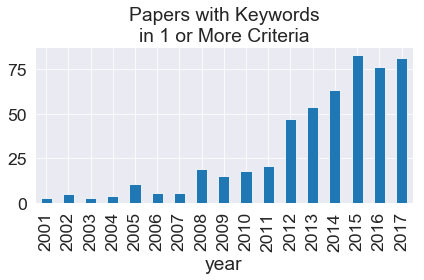

In [7]:
criteria_df = wosis.collate_keyword_criteria_matches(RC, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [8]:
criteria_df.count()

id                    11718
year                  11718
title                 11718
keywords              11718
abstract              11718
num_criteria_match    11718
dtype: int64

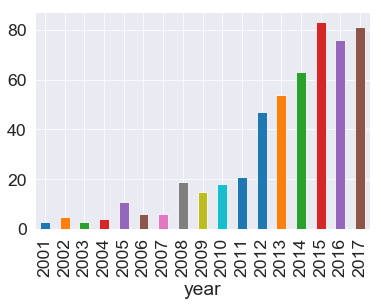

In [9]:
crit_trend_tmp = criteria_df.loc[criteria_df['num_criteria_match'] > 0, ~criteria_df.columns.isin(hide_columns)]

crit_trend_tmp.groupby('year').count()['title'].plot(kind='bar')

In [10]:
gsa_matches = wosis.keyword_matches(RC, criteria['GSA'], threshold=95.0)

In [11]:
gsa_collated = gsa_matches.combine_recs()
gsa_df = wosis.rc_to_df(gsa_collated)

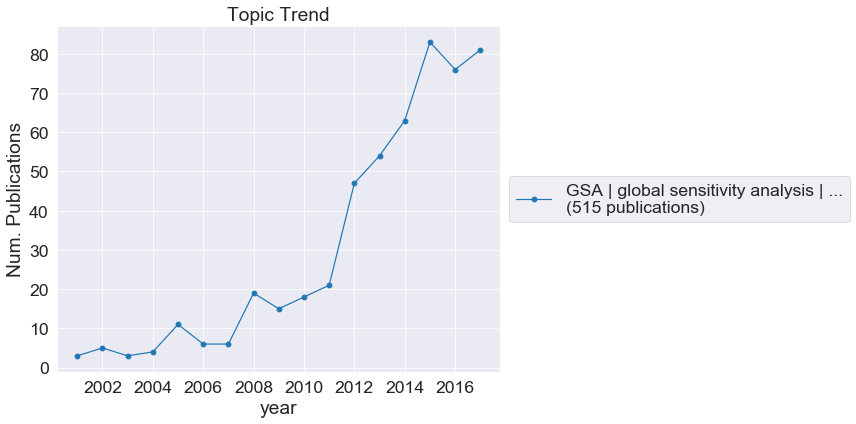

In [12]:
wos_plot.plot_topic_trend([gsa_matches], save_plot_fn='figs/gsa_topic_trend.png')

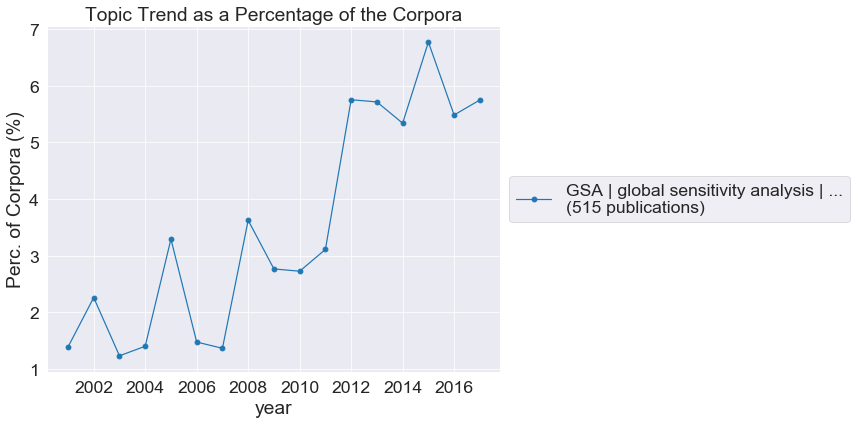

In [17]:
wos_plot.plot_topic_trend([gsa_matches], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/gsa_topic_trend_percentage.png')

In [13]:
gsa_df.to_csv('../data/gsa_matches.csv')